<a href="https://colab.research.google.com/github/sergioarnold87/Datathon/blob/main/Datathon_Sergio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

Mounted at /content/drive
'1. Human Resources Data'
'AWS Machine Learning Foundations Course'
 backup
'Caso_Practico Emotion_IA'
'Caso_Practico__Emotion IA'
'Caso_Practico Relaciones_Públicas'
'CheckPoint descargado'
'Colab Notebooks'
'COMPARTIDO CON ALUMNOS'
'Copia de Homework.ipynb'
 CPdatasets
'Data Analysis Masterclass '
 Data-Analysis-with-Pandas-and-Python
 Datasets
 Datathon
 Departamento-de-Ventas-Data_Science--
'Discreta Completo.pdf'
 DS-M1
 DS-M1-Checkpoint_02
 DS-M1-Checkpoint_03
'Entrelazamiento_ El Mayor Miste - Amir D. Aczel.epub'
 Examen
'Examen_ Examen Final 1.pdf'
 Files_Oskar
 Fore_New_And_Existing.xlsx
 Hands-On-Data-Analysis-with-Pandas
'Hands-On Data Analysis with Pandas Efficiently perform data collection, wrangling, analysis, and visualization using Python (Stefanie Molin) (z-lib.org).pdf'
 Healthcare+AI+Datasets
'Hoja de cálculo sin título.gsheet'
 Homework_2.ipynb
 Homework_c3.ipynb
 IMG_3899.jpg
 IMG_5725.jpg
'Lecturas '
'Materiales HENRY'
'Misiones Mayo 2

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



# Cargar Dataset

In [5]:
data_train = pd.read_excel('/content/drive/MyDrive/Datathon/E-Commerce_train.xlsx')
data_test = pd.read_excel('/content/drive/MyDrive/Datathon/E-Commerce_test.xlsx')

# Exploración de los Datos

In [6]:
data_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


In [7]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [8]:
print('1) Numero de filas de DATA_TRAIN: ',data_train.shape[1])
print('2) Numero de columnas de DATA_TRAIN : ',data_train.shape[0])
print('3) Numero de filas de DATA_TEST: ',data_test.shape[1])
print('4) Numero de columnas de DATA_TEST : ',data_test.shape[0])


1) Numero de filas de DATA_TRAIN:  12
2) Numero de columnas de DATA_TRAIN :  8999
3) Numero de filas de DATA_TEST:  11
4) Numero de columnas de DATA_TEST :  2000


In [9]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [10]:
data_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [11]:
df = data_train.copy()

In [12]:
#df.drop('ID', axis = 1, inplace = True)
#df.head()

# Análisis exploratorio de datos

In [13]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


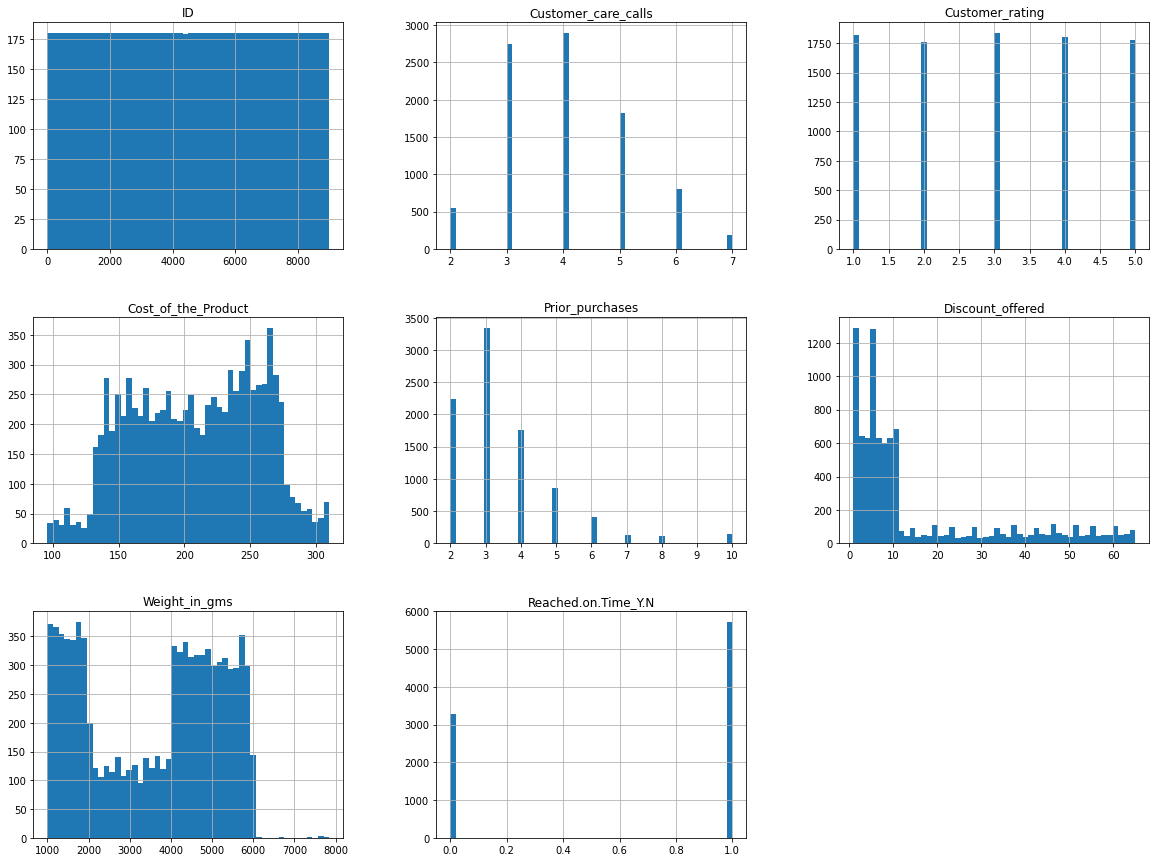

In [14]:
  # Histogramas para variables numericas
df.hist(bins=50, figsize=(20,15))
plt.show()

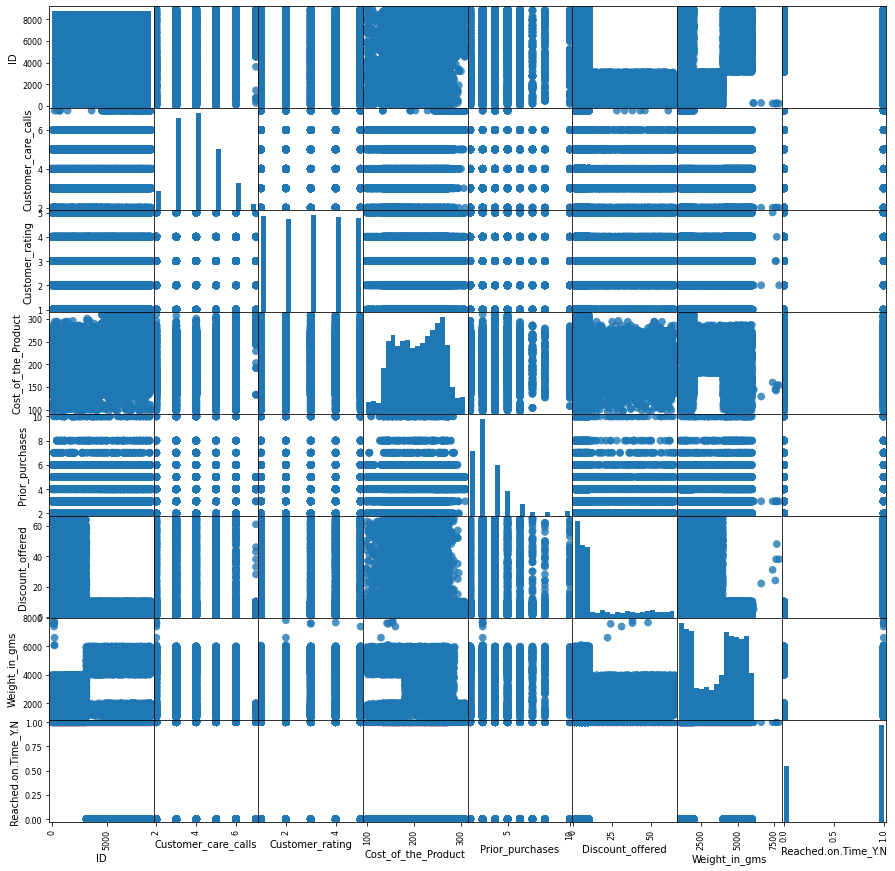

In [15]:
# Comprobar la correlación entre atributos
from pandas.plotting import scatter_matrix
scatter_matrix(df, marker='o', figsize=(15, 15), hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.show()

([<matplotlib.patches.Wedge at 0x7f302754c350>,
 [Text(0.45428743828885293, 1.0018098239750655, '0'),
  Text(-0.454287532085056, -1.0018097814416014, '1')],
 [Text(0.24779314815755613, 0.5464417221682175, '36.45%'),
  Text(-0.24779319931912144, -0.5464416989681462, '63.55%')])

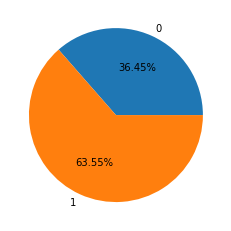

In [16]:
delay=pd.DataFrame(df.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(df)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')

* el 36.4% no llega a tiempo

In [17]:
df_v1 = df[df['Reached.on.Time_Y.N']==0]


Text(0, 0.5, 'porcentaje')

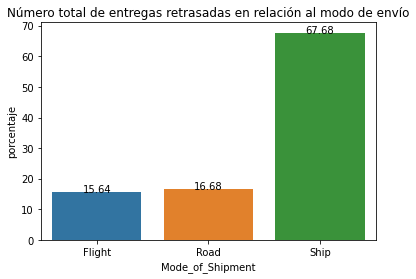

In [18]:
import seaborn as sns
df_v2=pd.DataFrame((df_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(df_v1)*100)
df_v2=df_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=df_v2 )
for index, row in df_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Número total de entregas retrasadas en relación al modo de envío')
plt.ylabel('porcentaje')

Alrededor del 68% de los retrasos en las entregas se deben a que los barcos se utilizan como medio de envío. Por lo tanto, se podrían considerar opciones alternativas como los servicios de vuelo y carretera para reducir las entregas retrasadas.

Text(0, 0.5, 'porcentaje')

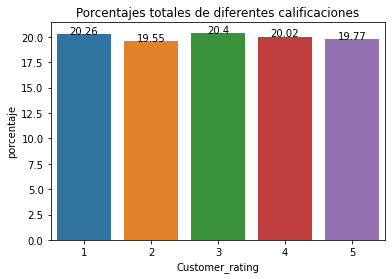

In [19]:
data_v4=pd.DataFrame((df.groupby(['Customer_rating'])['ID'].count())/len(df)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Porcentajes totales de diferentes calificaciones')
plt.ylabel('porcentaje')

Casi el 20% del total de entregas recibió 5 de calificación

Text(0.5, 1.0, 'Importancia del producto en relación si llegó a tiempo a tiempo o no')

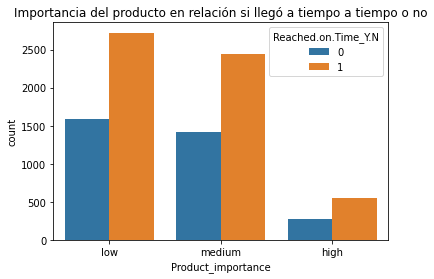

In [20]:
sns.countplot(x = "Product_importance", data = df, hue="Reached.on.Time_Y.N")
plt.title("Importancia del producto en relación si llegó a tiempo a tiempo o no")

Los clientes están pidiendo más cantidad de productos de poca importancia de este grupo de comercio electrónico.

In [21]:
# agrupación de columnas por tipo
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [22]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Discount_offered,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,3.511501,15.097678,208.561507,3584.364596,0.635515
std,1.138934,1.413143,1.532074,17.400040,48.289172,1614.750194,0.481312
min,2.000000,1.000000,2.000000,1.000000,96.000000,1001.000000,0.000000
25%,3.000000,2.000000,3.000000,4.000000,168.000000,1857.000000,0.000000
50%,4.000000,3.000000,3.000000,8.000000,211.000000,4046.000000,1.000000
75%,5.000000,4.000000,4.000000,19.000000,249.500000,4999.500000,1.000000
max,7.000000,5.000000,10.000000,65.000000,310.000000,7846.000000,1.000000


Algunas observaciones:

1 Las columnas Customer_care_calls, customer_rating y Cost_of_the_Product parecen tener una distribución bastante simétrica (la media y la mediana no son muy diferentes)

2 Las columnas Discount_offered y Prior_purchases parecen estar sesgadas hacia la derecha (cola larga a la derecha)

3 La columna Reached.on.Time_Y.N es booleana/binaria

In [23]:
df[cats].describe()

,Mode_of_Shipment,Product_importance,Gender,Warehouse_block
count,8999,8999,8999,8999
unique,3,3,2,5
top,Ship,low,F,F
freq,6122,4308,4540,2999


Algunas observaciones:

1 La categoría de género femenino es más dominante,
para la categoría de importancia del producto, está dominada por la categoría baja.

2 para la categoría de modo de envío predomina el envío por barco (barco)
for warehouse_block está dominado por el bloque F.

3 Todos los valores únicos para cada categoría todavía están en la categoría normal alrededor de 2-5 valores únicos.

Recuento de valores de cada columna

In [24]:
for col in cats:
    print(f'''Recuento de valores de cada columna {col}:''')
    print(df[col].value_counts())
    print()

Recuento de valores de cada columna Mode_of_Shipment:
Ship      6122
Flight    1447
Road      1430
Name: Mode_of_Shipment, dtype: int64

Recuento de valores de cada columna Product_importance:
low       4308
medium    3858
high       833
Name: Product_importance, dtype: int64

Recuento de valores de cada columna Gender:
F    4540
M    4459
Name: Gender, dtype: int64

Recuento de valores de cada columna Warehouse_block:
F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64



In [25]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Box plots

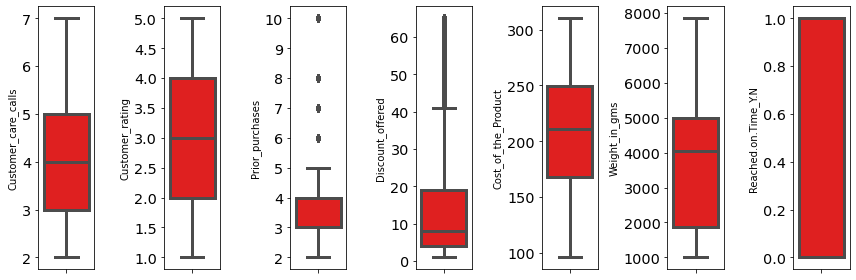

In [26]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red', orient='v')
    plt.tight_layout()

## Distibution plots

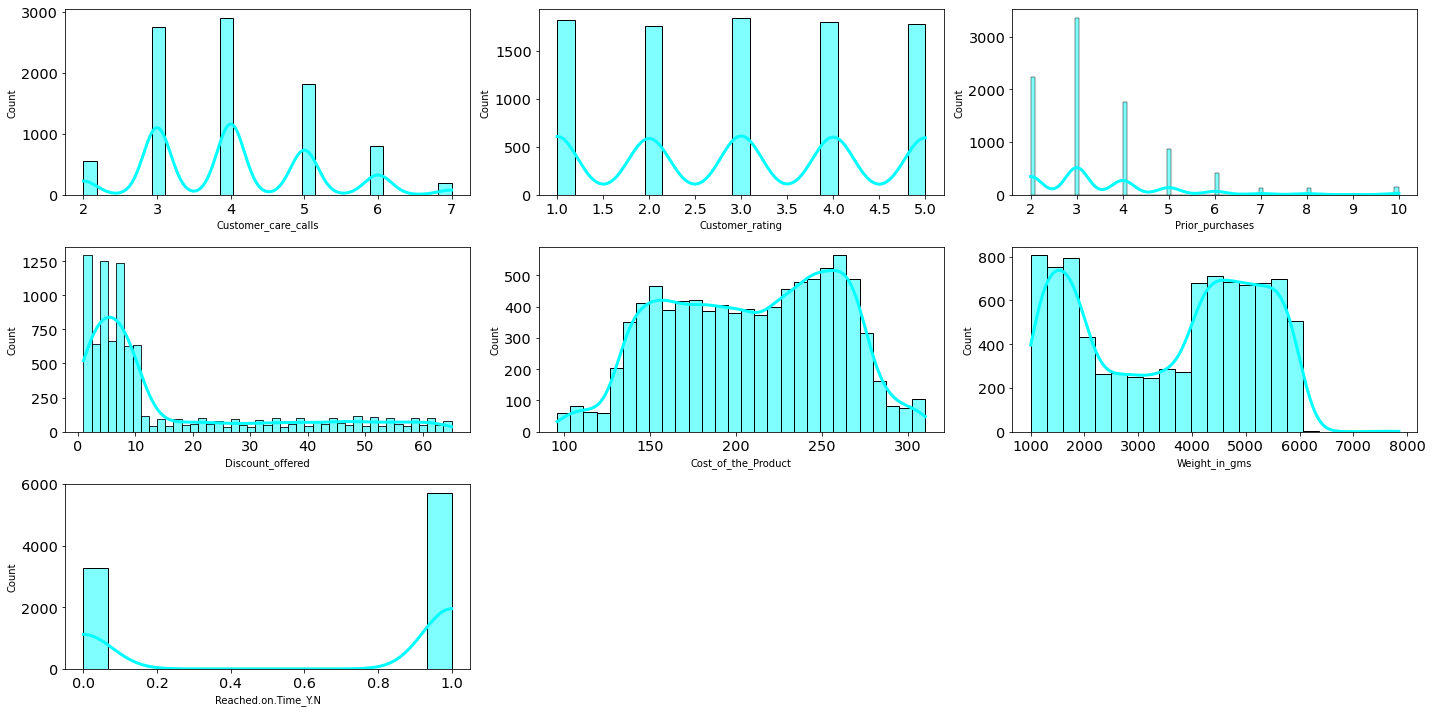

In [27]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='cyan')
    plt.xlabel(features[i])
    plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


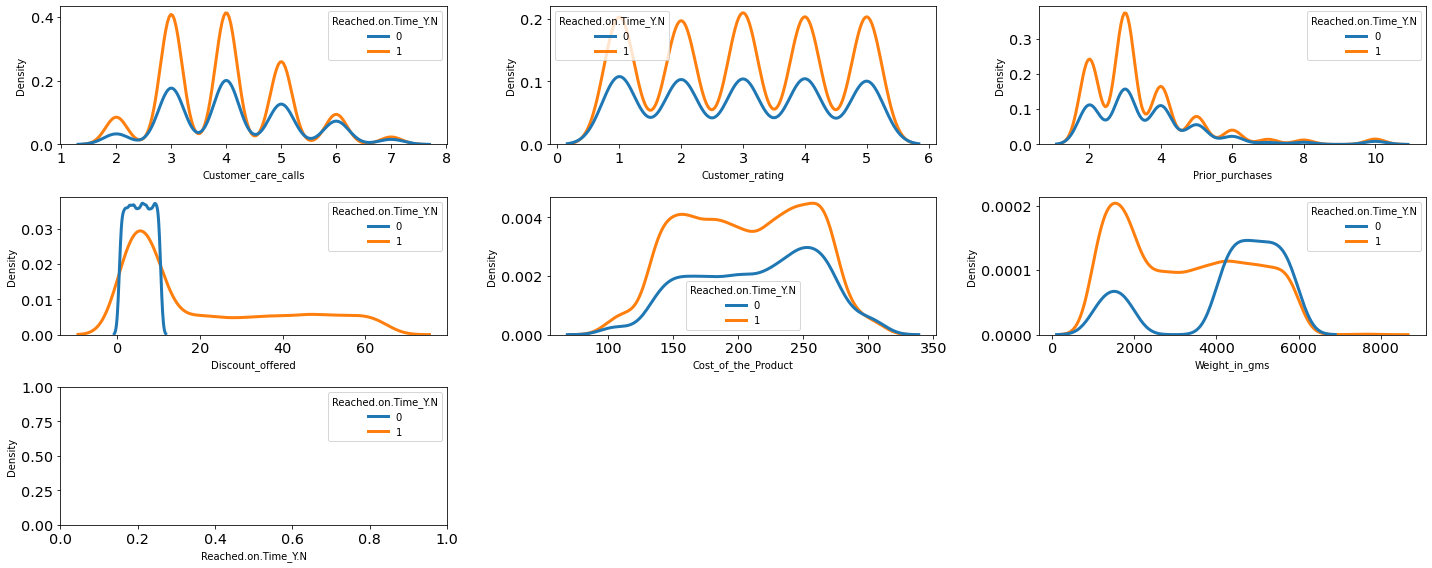

In [28]:
features = nums
plt.figure(figsize=(20,8))
for i in range(0, len(features)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.kdeplot(data=df, x=features[i], hue='Reached.on.Time_Y.N')
    #plt.xlabel(features[i])
    plt.tight_layout()

### Del gráfico de distribución se puede ver:

La columna cost_of_the_product parece estar cerca de una distribución normal

Como sospechábamos al observar el gráfico de caja anterior, las columnas Compras_previas y Descuento_ofrecido están ligeramente sesgadas, lo que significa que existe la posibilidad de que tengamos que hacer algo con estas columnas más adelante.

Las columnas Reached.on.Time son en realidad binarias, por lo que no necesita prestar demasiada atención a la forma de la distribución.

Para la columna de Weight_in_gms hay una incertidumbre de distribución porque tiene forma de u.

para la columna customer_care_calls y customer_rating distribuidas uniformemente

## Violin Plot

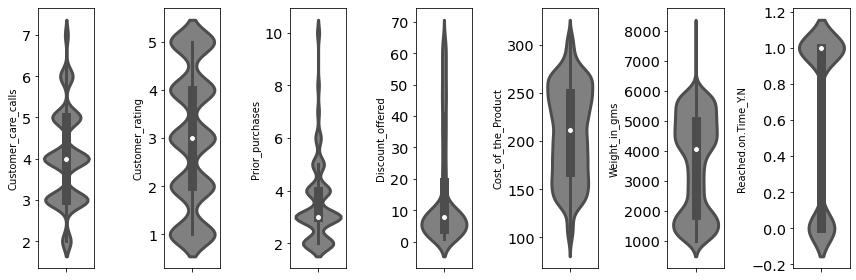

In [29]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()  

## Count plot(categorical)


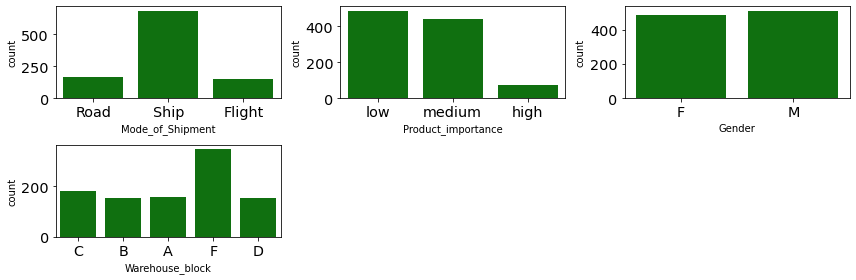

In [30]:
# distribución categórica
df_sample = df.sample(1000, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

Como observamos anteriormente, la distribución de categoría baja (Product_importance), warehouse_block y Ship category (Mode_of_Shipment) está dominada por 1-2 valores.

## Matriz de Correlación

In [31]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.214326,-0.000819,0.221421,0.133232,-0.622558,0.361232,-0.457131
Customer_care_calls,0.214326,1.000000,0.012131,0.318109,0.164541,-0.128805,-0.237731,-0.072261
Customer_rating,-0.000819,0.012131,1.000000,0.009818,0.015606,-0.004315,-0.000227,0.011045
Cost_of_the_Product,0.221421,0.318109,0.009818,1.000000,0.100637,-0.138259,-0.057113,-0.083470
Prior_purchases,0.133232,0.164541,0.015606,0.100637,1.000000,-0.072634,-0.113060,-0.048269
Discount_offered,-0.622558,-0.128805,-0.004315,-0.138259,-0.072634,1.000000,-0.417782,0.416357
Weight_in_gms,0.361232,-0.237731,-0.000227,-0.057113,-0.113060,-0.417782,1.000000,-0.326877
Reached.on.Time_Y.N,-0.457131,-0.072261,0.011045,-0.083470,-0.048269,0.416357,-0.326877,1.000000


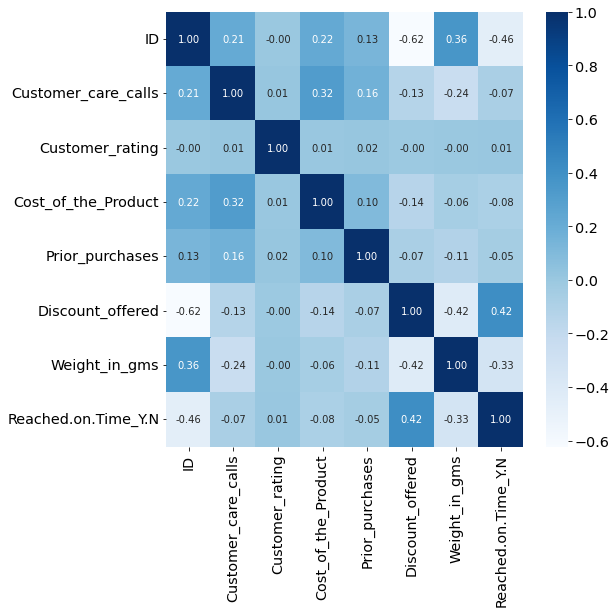

In [32]:
corr_df = df.corr()
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

Del mapa de calor de correlación anterior, se puede ver que:

Nuestro objetivo Reached.on.Time_Y.N tiene una correlación positiva débil con la calificación del cliente, el costo del producto, las llamadas de atención al cliente y las compras anteriores.

También tiene una correlación positiva bastante fuerte con Discount_offered
también tiene una correlación negativa bastante fuerte con Weight_in_gms

<Figure size 1080x1080 with 0 Axes>

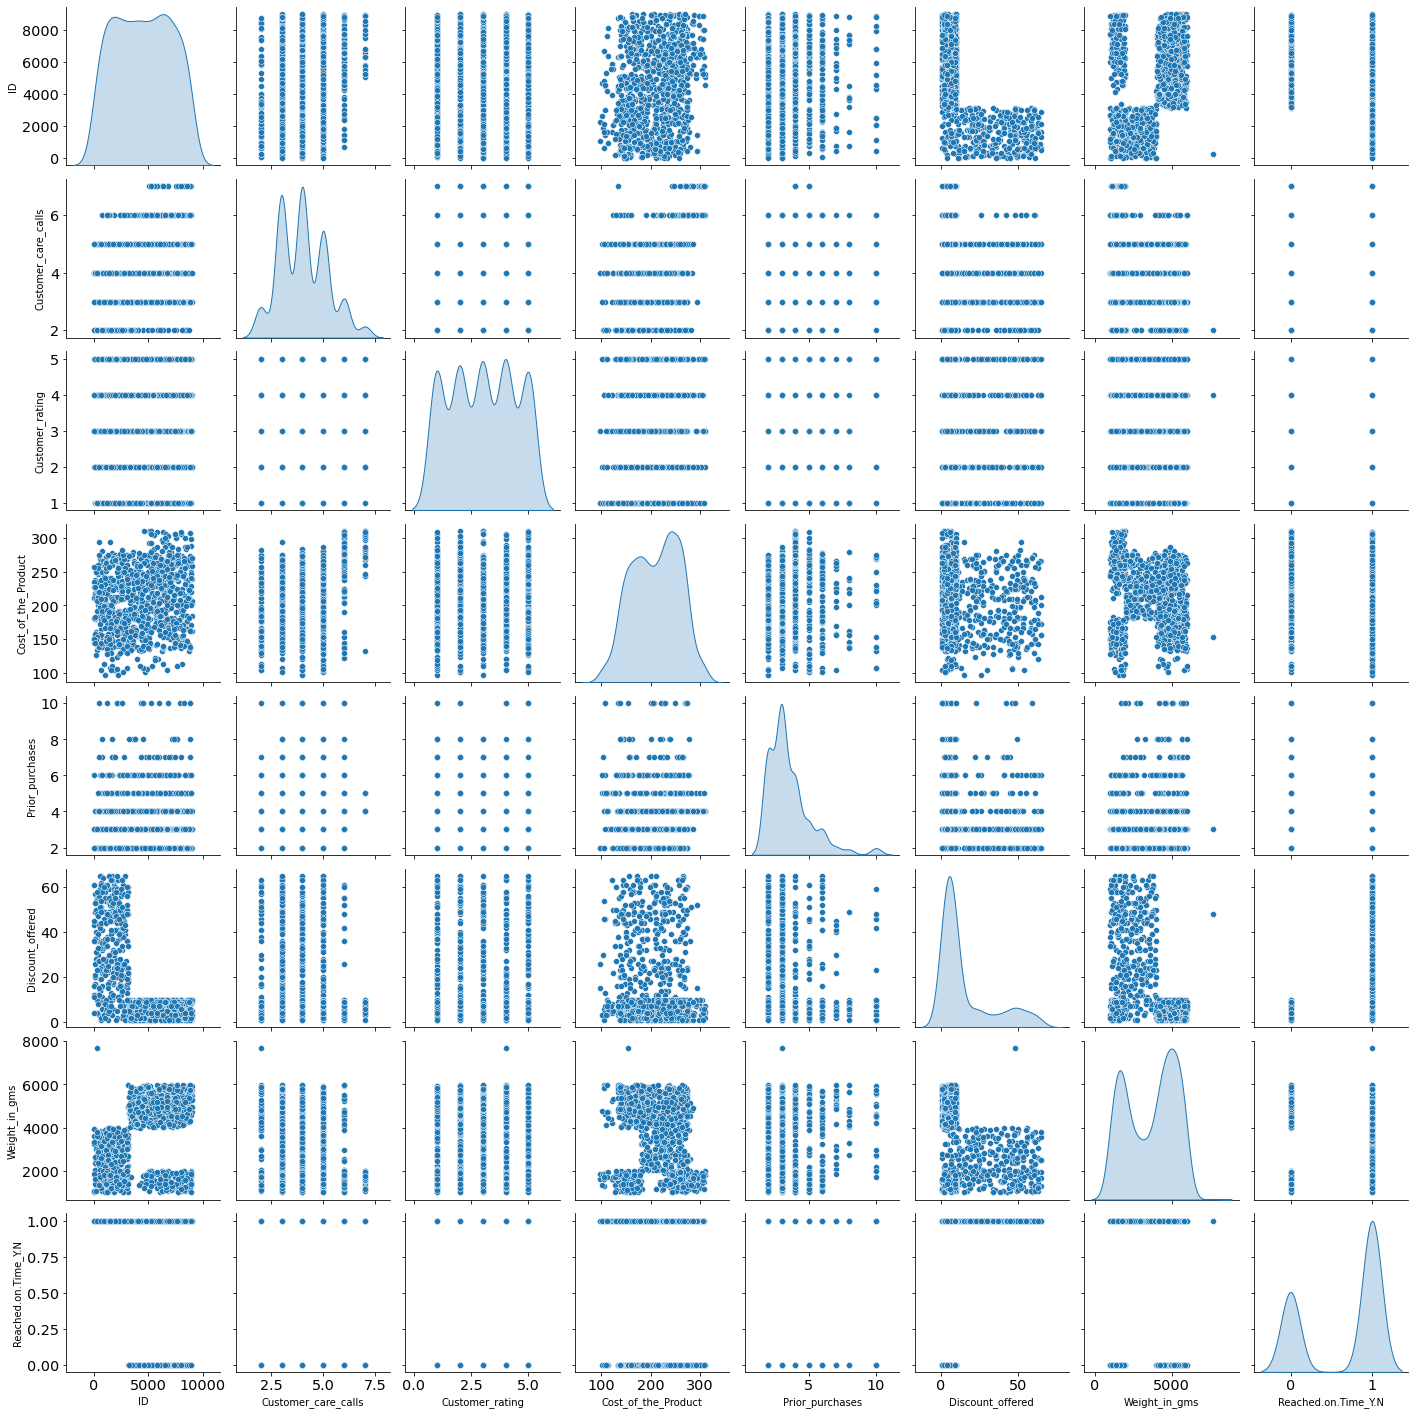

In [33]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_sample, diag_kind='kde');

Reached.on.time_YN (que está a tiempo) tiende a ser más alto para Low Discount_offered.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

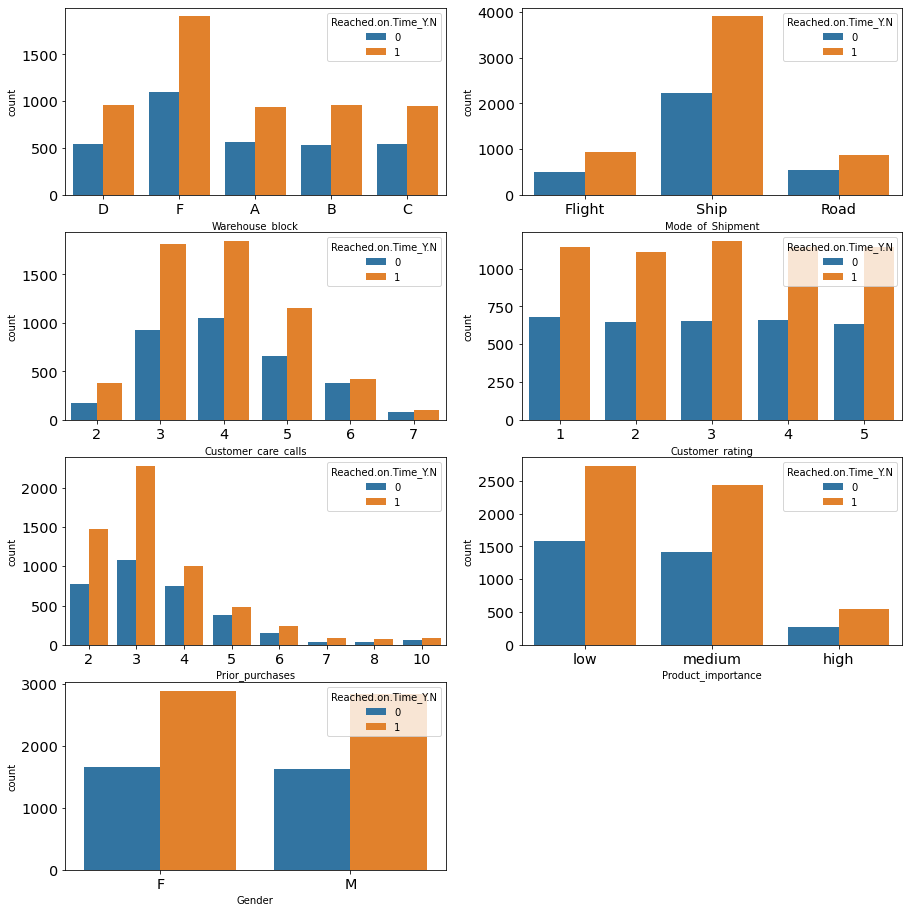

In [34]:
# Exploramos la relación entre Reached.on.Time_Y.N y otros atributos
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = df, ax=ax)
    plotnumber += 1
plt.show()

1- Productos entregados a tiempo con barco más que Carretera o aereo 

2- Productos entregados a tiempo con la importancia del producto de (Baja y Media) son más que Alta.

3- en la variable warehouse_block vemos que categoría F tiende a experimentar retrasos en la entrega.

# Algunas Pivot Tables para ver resumenes

In [35]:
df_group1 = df.groupby(['Reached.on.Time_Y.N','Mode_of_Shipment']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,Reached.on.Time_Y.N,Mode_of_Shipment,ID
0,0,Flight,513
1,0,Road,547
2,0,Ship,2220
3,1,Flight,934
4,1,Road,883
5,1,Ship,3902


In [36]:
df_group2 = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index() 
df_group2

,Reached.on.Time_Y.N,ID
0,0,3280
1,1,5719


In [37]:
df_group3 = df_group1.merge(df_group2, on = 'Reached.on.Time_Y.N')
df_group3

,Reached.on.Time_Y.N,Mode_of_Shipment,ID_x,ID_y
0,0,Flight,513,3280
1,0,Road,547,3280
2,0,Ship,2220,3280
3,1,Flight,934,5719
4,1,Road,883,5719
5,1,Ship,3902,5719


In [38]:
df_group4 = df.groupby('Mode_of_Shipment').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,Mode_of_Shipment,ID
0,Flight,1447
1,Road,1430
2,Ship,6122


In [39]:
df_group5 = df_group1.merge(df_group4, on = 'Mode_of_Shipment')
df_group5

,Reached.on.Time_Y.N,Mode_of_Shipment,ID_x,ID_y
0,0,Flight,513,1447
1,1,Flight,934,1447
2,0,Road,547,1430
3,1,Road,883,1430
4,0,Ship,2220,6122
5,1,Ship,3902,6122


In [40]:
df_group11 = df.groupby(['Reached.on.Time_Y.N','Product_importance']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,Reached.on.Time_Y.N,Product_importance,ID
0,0,high,279
1,0,low,1586
2,0,medium,1415
3,1,high,554
4,1,low,2722
5,1,medium,2443


# Llegada del paquete basada en la oferta de descuento.

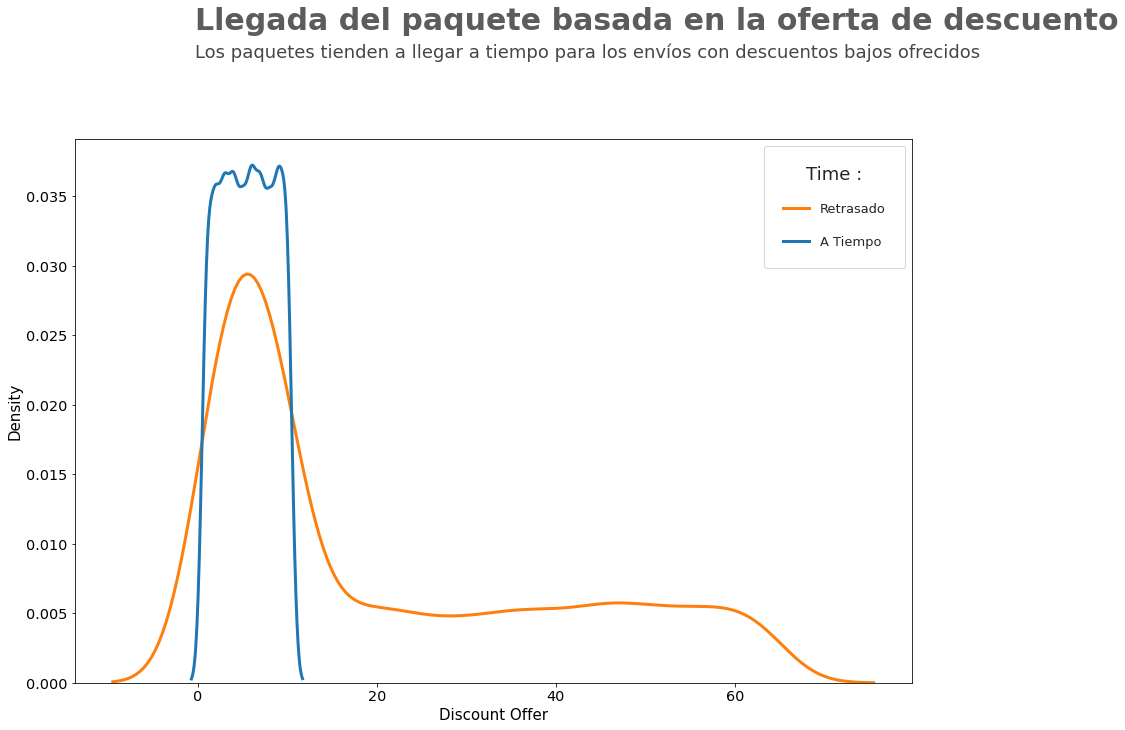

In [41]:
plt.figure(figsize=(15,10))
chart = sns.kdeplot(data=df, x='Discount_offered',hue='Reached.on.Time_Y.N')

sns.set(font_scale= 1.5)
sns.set_style('white')
sns.set_palette('prism')

chart.set_xlabel("Discount Offer", fontsize = 15)
chart.set_ylabel("Density", fontsize = 15)

plt.legend(loc='upper right', borderpad=1.5, labelspacing=1.5, fontsize=13, title='Time :', labels=['Retrasado', 'A Tiempo'])

# Añadiendo etiqueta
chart.text(x = -0.3, y = 0.047, s = "Llegada del paquete basada en la oferta de descuento",
               fontsize = 30, weight = 'bold', alpha = .75)
chart.text(x = -0.3, y = 0.045,
               s = 'Los paquetes tienden a llegar a tiempo para los envíos con descuentos bajos ofrecidos',
              fontsize = 18, alpha = .85);

# Feature Engineerging

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

## Filtramos los posibles outliers.

In [43]:
df2 = df.copy()
print(f'Número de filas antes de filtrar valores atípicos: {len(df2)}')

filtered_entries1 = np.array([True] * len(df2))

for col in nums:
    zscore = abs(stats.zscore(df2[col])) # calcular el Z score absoluto
    filtered_entries1 = (zscore < 3) & filtered_entries1 # mantener menos de 3 el z score absoluto
    
df2 = df2[filtered_entries1] # filtro, toma el z score por debajo de 3

print(f'Número de filas después de filtrar valores atípicos: {len(df2)}')

Número de filas antes de filtrar valores atípicos: 8999
Número de filas después de filtrar valores atípicos: 8847


In [44]:
# Fitear la columna 'Customer_rating' 

df2['Customer_rating'] = MinMaxScaler().fit_transform(df2['Customer_rating'].values.reshape(len(df2), 1))

# Estandarización

df2['Customer_care_calls'] = StandardScaler().fit_transform(df2['Customer_care_calls'].values.reshape(len(df2), 1))
df2['Cost_of_the_Product'] = StandardScaler().fit_transform(df2['Cost_of_the_Product'].values.reshape(len(df2), 1))
df2['Prior_purchases'] = StandardScaler().fit_transform(df2['Prior_purchases'].values.reshape(len(df2), 1))
df2['Discount_offered'] = StandardScaler().fit_transform(df2['Discount_offered'].values.reshape(len(df2), 1))
df2['Weight_in_gms'] = StandardScaler().fit_transform(df2['Weight_in_gms'].values.reshape(len(df2), 1))


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8847 non-null   int64  
 1   Warehouse_block      8847 non-null   object 
 2   Mode_of_Shipment     8847 non-null   object 
 3   Customer_care_calls  8847 non-null   float64
 4   Customer_rating      8847 non-null   float64
 5   Cost_of_the_Product  8847 non-null   float64
 6   Prior_purchases      8847 non-null   float64
 7   Product_importance   8847 non-null   object 
 8   Gender               8847 non-null   object 
 9   Discount_offered     8847 non-null   float64
 10  Weight_in_gms        8847 non-null   float64
 11  Reached.on.Time_Y.N  8847 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 898.5+ KB


In [46]:
df2.describe()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8847.000000,8.847000e+03,8847.000000,8.847000e+03,8.847000e+03,8.847000e+03,8.847000e+03,8847.000000
mean,4502.338533,-3.951475e-16,0.497937,2.248807e-16,1.285033e-16,-1.927549e-17,-3.212582e-18,0.636035
std,2599.632159,1.000057e+00,0.353137,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,0.481166
min,1.000000,-1.770530e+00,0.000000,-2.332667e+00,-1.089402e+00,-8.092287e-01,-1.592035e+00,0.000000
25%,2254.500000,-8.945722e-01,0.250000,-8.419252e-01,-1.089402e+00,-6.370335e-01,-1.068867e+00,0.000000
50%,4513.000000,-1.861423e-02,0.500000,4.837894e-02,-3.112704e-01,-4.074399e-01,2.860525e-01,1.000000
75%,6747.500000,8.573437e-01,0.750000,8.558641e-01,4.668616e-01,2.239427e-01,8.772449e-01,1.000000
max,8999.000000,2.609260e+00,1.000000,2.098149e+00,3.579390e+00,2.864270e+00,2.640928e+00,1.000000


In [47]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df2['Product_importance'] = df2['Product_importance'].map(mapping_Product_importance)
df2['Gender'] = df2['Gender'].map(mapping_Gender)

In [48]:
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,-0.018614,0.25,-0.655582,-0.311270,0,0,1.658903,-1.448566,1
1,2,F,Flight,-0.018614,1.00,0.151903,-1.089402,0,1,2.519879,-0.301430,1
2,3,A,Flight,-1.770530,0.25,-0.531354,0.466862,0,1,1.888497,-0.124567,1
3,4,B,Flight,-0.894572,0.50,-0.676287,0.466862,1,1,-0.292643,-1.483196,1
4,5,C,Flight,-1.770530,0.25,-0.510649,-0.311270,1,0,1.773700,-0.674944,1


In [49]:
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)
    

In [50]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8847 non-null   int64  
 1   Warehouse_block          8847 non-null   object 
 2   Mode_of_Shipment         8847 non-null   object 
 3   Customer_care_calls      8847 non-null   float64
 4   Customer_rating          8847 non-null   float64
 5   Cost_of_the_Product      8847 non-null   float64
 6   Prior_purchases          8847 non-null   float64
 7   Product_importance       8847 non-null   int64  
 8   Gender                   8847 non-null   int64  
 9   Discount_offered         8847 non-null   float64
 10  Weight_in_gms            8847 non-null   float64
 11  Reached.on.Time_Y.N      8847 non-null   int64  
 12  Mode_of_Shipment_Flight  8847 non-null   uint8  
 13  Mode_of_Shipment_Road    8847 non-null   uint8  
 14  Mode_of_Shipment_Ship   

In [51]:
df2 = df2.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])


In [52]:
df2.describe()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
count,8847.000000,8.847000e+03,8847.000000,8.847000e+03,8.847000e+03,8847.000000,8847.000000,8.847000e+03,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000,8847.000000
mean,4502.338533,-3.951475e-16,0.497937,2.248807e-16,1.285033e-16,0.605403,0.495309,-1.927549e-17,-3.212582e-18,0.636035,0.161411,0.158359,0.680231,0.166610,0.166497,0.166723,0.166610,0.333559
std,2599.632159,1.000057e+00,0.353137,1.000057e+00,1.000057e+00,0.645990,0.500006,1.000057e+00,1.000057e+00,0.481166,0.367930,0.365098,0.466413,0.372649,0.372547,0.372750,0.372649,0.471511
min,1.000000,-1.770530e+00,0.000000,-2.332667e+00,-1.089402e+00,0.000000,0.000000,-8.092287e-01,-1.592035e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2254.500000,-8.945722e-01,0.250000,-8.419252e-01,-1.089402e+00,0.000000,0.000000,-6.370335e-01,-1.068867e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4513.000000,-1.861423e-02,0.500000,4.837894e-02,-3.112704e-01,1.000000,0.000000,-4.074399e-01,2.860525e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6747.500000,8.573437e-01,0.750000,8.558641e-01,4.668616e-01,1.000000,1.000000,2.239427e-01,8.772449e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,8999.000000,2.609260e+00,1.000000,2.098149e+00,3.579390e+00,2.000000,1.000000,2.864270e+00,2.640928e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Empezamos con los Modelos

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import validation_curve

# Random Forest

In [54]:
# Creamos una función para evaluar los modelos con distintas metricas
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
  print('Accuracy : %.2f' % accuracy_score(ytest, pred))
  print('Precision : %.2f' % precision_score(ytest, pred))
  print('Recall : %.2f' % recall_score(ytest, pred))
  print('F-1Score : %.2f' % f1_score(ytest, pred))

  fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
  print('ROC AUC : %.2f' % auc(fpr, tpr))

  # Puntuación de precisión promedio
  average_precision = average_precision_score(ytest, pred)
  print('AP : %.2f'% average_precision)


In [55]:
# Creamos la función para ver las caracteristicas importantes
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

In [56]:
# Función para encontrar el mejor hiperparametro
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [57]:
# Elejimos las X, y la y
X = df2.drop(columns = ['ID','Reached.on.Time_Y.N','Customer_care_calls', 'Customer_rating'])
y = df2['Reached.on.Time_Y.N']

In [58]:
# Evaluation Metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

Accuracy : 0.68
Precision : 0.78
Recall : 0.71
F-1Score : 0.74
ROC AUC : 0.67
AP : 0.74


In [59]:

# validación del modelo Random Forest
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  1.0
test Accuracy :  0.6841807909604519


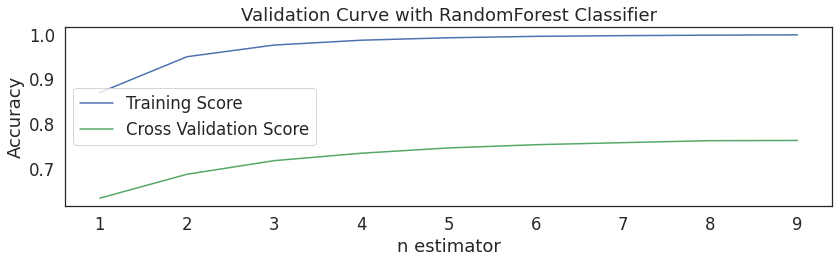

In [60]:
# Tuneamos lo Hyperparametros de Random Forest
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calcular la media y la desviación estandar del training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calcular la media y la desviación estandar del testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Ploteamos  la media y la desviación estandar de los training y testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creamos el plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [61]:
# Evaluamos las Metricas
model = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)

Accuracy : 0.68
Precision : 0.70
Recall : 0.85
F-1Score : 0.77
ROC AUC : 0.60
AP : 0.70


In [62]:
# Validación del Accuracy del modelo
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6819273703546701
test Accuracy :  0.6751412429378532


Text(0.5, 1.0, 'feature importance score')

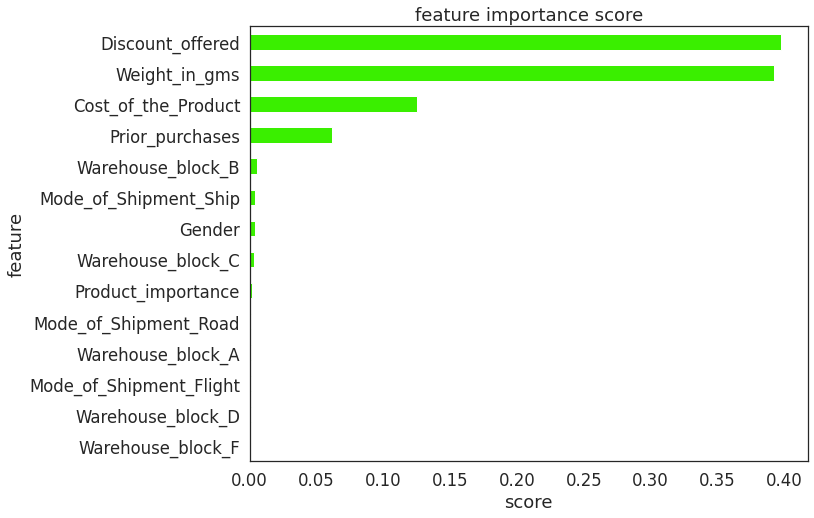

In [63]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Con el gráfico podemos ver las columnas mas significativas

In [64]:
pred = prediction
pred = pd.DataFrame(prediction, columns=['prediction']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87.csv')

In [65]:
pred = prediction
pred

array([1, 1, 1, ..., 1, 1, 1])

# XGBOOST

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [67]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: etiqueta que consideramos positiva
    print("AUC: %.2f" % auc(fpr, tpr))

In [68]:
# Creamos una función para graficar las caracteristicas mas importantes
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(15, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [69]:
# Función para observar los mejores hiperparametros 
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [70]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls', 'Customer_rating','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.90
Recall (Test Set): 0.63
F1-Score (Test Set): 0.74
AUC: 0.75


In [71]:
print('Train score: ' + str(xg.score(X_train, y_train)))
print('Test score:' + str(xg.score(X_test, y_test)))

Train score: 0.7327963826480147
Test score:0.7124293785310735


In [72]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# hyperparametros en un diccionario
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# creamos el algoritmo XGBoost 
xg = XGBClassifier(random_state=42)
xg_tuned1 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned1.fit(X_train,y_train)

# Predict y Evaluation
y_pred = xg_tuned1.predict(X_test)#Checkeamos rendimiento del modelo
eval_classification(xg_tuned1, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.80
Recall (Test Set): 0.71
F1-Score (Test Set): 0.75
AUC: 0.70


In [73]:
pred = y_pred

In [74]:
pred = pd.DataFrame(prediction, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_2.csv')

In [75]:
print('Train score: ' + str(xg_tuned1.score(X_train, y_train)))
print('Test score:' + str(xg_tuned1.score(X_test, y_test)))

Train score: 0.9124472693615205
Test score:0.7834987506553482


In [76]:
# vector X / vector y
X = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Warehouse_block_D','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

# Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.71
Precision (Test Set): 0.90
Recall (Test Set): 0.62
F1-Score (Test Set): 0.73
AUC: 0.75


In [77]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [78]:
print('Train score: ' + str(xg.score(X_train, y_train)))
print('Test score:' + str(xg.score(X_test, y_test)))

Train score: 0.7356224388865339
Test score:0.7084745762711865


In [79]:
# Ajustando los hiperparametros
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Convertir en un diccionario
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Iniciar XGboost
xg = XGBClassifier(random_state=42)
xg_tuned2 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned2.fit(X_train,y_train)

# Predict & Evaluació
y_pred = xg_tuned2.predict(X_test) # Comprobar el rendimiento del modelo.
eval_classification(xg_tuned2, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.81
Recall (Test Set): 0.69
F1-Score (Test Set): 0.75
AUC: 0.70


In [80]:
print('Train score: ' + str(xg_tuned2.score(X_train, y_train)))
print('Test score:' + str(xg_tuned2.score(X_test, y_test)))

Train score: 0.8728317213069627
Test score:0.7851155086059768


In [81]:
pred_xgboost= pd.DataFrame(prediction, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_3.csv')

# Decision Tree


In [82]:

X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

# Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.75
Recall (Test Set): 0.77
F1-Score (Test Set): 0.76
AUC: 0.65


In [84]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.6858757062146893


AUCHH!! OVERFITING

In [85]:
# Ajuste de Hyperparametros con RandomSearch
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Lista de hyperparametro
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Número máximo de niveles en el árbol
min_samples_split = [2, 5, 10, 100] # Número mínimo de muestras requeridas para dividir un nodo
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Número mínimo de muestras requeridas en cada nodo hoja
max_features = ['auto', 'sqrt'] # Número de características a considerar en cada división
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                       )


In [86]:
# Inicialización del modelo
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='recall')

In [87]:
# Predicción y Evaluación
y_pred = model.predict(X_test)#Comprobar el rendimiento del modelo
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)


Accuracy (Test Set): 0.68
Precision (Test Set): 0.78
Recall (Test Set): 0.70
F1-Score (Test Set): 0.74
AUC: 0.68


In [88]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 91
Best min_samples_split: 100
Best min_samples_leaf: 1
Best max_features: auto
Best criterion: entropy
Best splitter: random


In [89]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.7232998885172798
Test score:0.7040280210157618


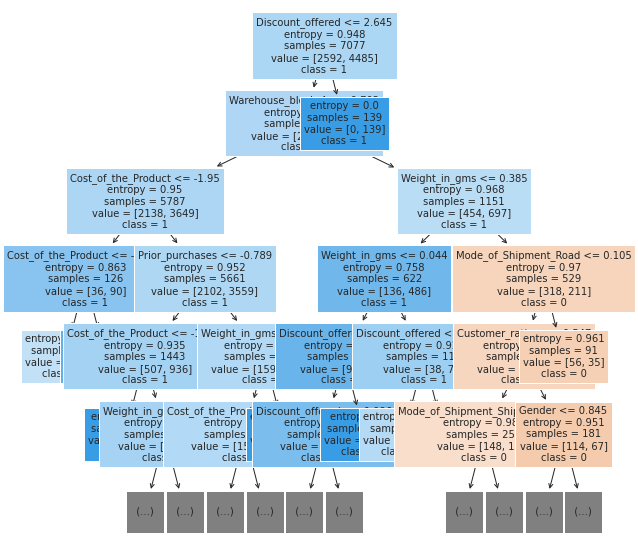

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [91]:
# Características a utilizar
# Discount_offered
# Weight_in_gms
# Prior_purchases
# Cost_of_the_Product
X = df2.drop(columns=['ID','Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Product_importance','Gender','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.77
Recall (Test Set): 0.76
F1-Score (Test Set): 0.77
AUC: 0.68


In [93]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 1.0
Test score:0.7005649717514124


Otro Overfit

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Lista de hyperparametro
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Número máximo de niveles en el árbol
min_samples_split = [2, 5, 10, 100] # Número mínimo de muestras requeridas para dividir un nodo
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Número mínimo de muestras requeridas en cada nodo hoja
max_features = ['auto', 'sqrt']  # Número de características a considerar en cada división
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

In [95]:
# Inicialización del modelo
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model.predict(X_test)#Comprobar el rendimiento del modelo
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.79
Recall (Test Set): 0.73
F1-Score (Test Set): 0.76
AUC: 0.69


In [96]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])
print('Best criterion:', model.best_estimator_.get_params()['criterion'])
print('Best splitter:', model.best_estimator_.get_params()['splitter'])

Best max_depth: 16
Best min_samples_split: 5
Best min_samples_leaf: 20
Best max_features: sqrt
Best criterion: gini
Best splitter: best


In [97]:
print('Train score: ' + str(model.score(X_train, y_train)))
print('Test score:' + str(model.score(X_test, y_test)))

Train score: 0.8477104752467072
Test score:0.7859793133066361


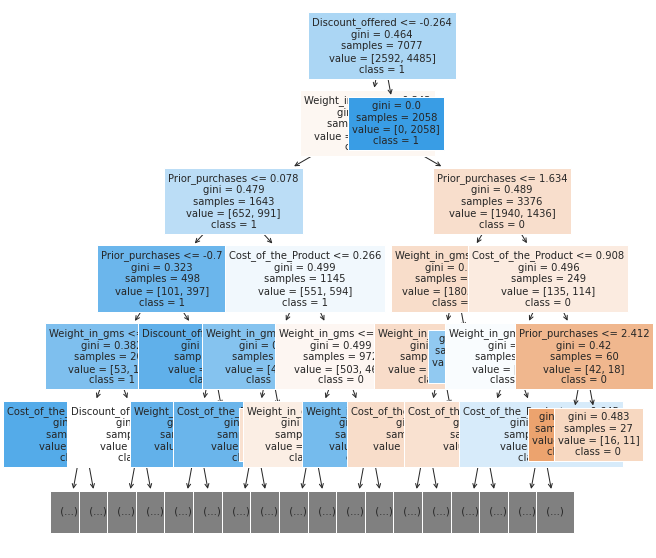

In [98]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [99]:
pred = pd.DataFrame(y_pred, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_4.csv')

# Logistic Regression

In [100]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.75
Recall (Test Set): 0.74
F1-Score (Test Set): 0.75
AUC: 0.65


In [102]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.6704818425886675
Test score:0.676271186440678


In [103]:
# con Hyperparametros
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Lista de hiperparámetros a probar
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002]# los valores más chicos especifican una regularización más fuerte.
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C , solver=solver)

# Iniciación modelo
logres = LogisticRegression(random_state=42) 
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Test Set): 1.00
F1-Score (Test Set): 0.78
AUC: 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

da OVERFIT

In [104]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.0001
Best solver: saga


In [105]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.763168638259218
Test score:0.7662986491460952


In [106]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Product_importance','Gender','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.76
Recall (Test Set): 0.74
F1-Score (Test Set): 0.75
AUC: 0.65


In [108]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.6644058216758514
Test score:0.6785310734463277


In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Lista de hiperparámetros a probar
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] 
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C , solver=solver)


logres = LogisticRegression(random_state=42) 
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fitting Model & Evaluation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.65
Recall (Test Set): 1.00
F1-Score (Test Set): 0.78
AUC: 0.50


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

In [110]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.0001
Best solver: sag


In [111]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

Train score: 0.760096583949241
Test score:0.7663739444710922


In [112]:
pred = pd.DataFrame(y_pred, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_5.csv',index=False)

In [113]:
pred

# Red Neuronal

## Instalar Tensorflow y Keras


In [114]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8847 non-null   int64  
 1   Customer_care_calls      8847 non-null   float64
 2   Customer_rating          8847 non-null   float64
 3   Cost_of_the_Product      8847 non-null   float64
 4   Prior_purchases          8847 non-null   float64
 5   Product_importance       8847 non-null   int64  
 6   Gender                   8847 non-null   int64  
 7   Discount_offered         8847 non-null   float64
 8   Weight_in_gms            8847 non-null   float64
 9   Reached.on.Time_Y.N      8847 non-null   int64  
 10  Mode_of_Shipment_Flight  8847 non-null   uint8  
 11  Mode_of_Shipment_Road    8847 non-null   uint8  
 12  Mode_of_Shipment_Ship    8847 non-null   uint8  
 13  Warehouse_block_A        8847 non-null   uint8  
 14  Warehouse_block_B       

In [116]:
X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label


In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8847 entries, 0 to 8998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_care_calls      8847 non-null   float64
 1   Customer_rating          8847 non-null   float64
 2   Cost_of_the_Product      8847 non-null   float64
 3   Prior_purchases          8847 non-null   float64
 4   Product_importance       8847 non-null   int64  
 5   Gender                   8847 non-null   int64  
 6   Discount_offered         8847 non-null   float64
 7   Weight_in_gms            8847 non-null   float64
 8   Mode_of_Shipment_Flight  8847 non-null   uint8  
 9   Mode_of_Shipment_Road    8847 non-null   uint8  
 10  Mode_of_Shipment_Ship    8847 non-null   uint8  
 11  Warehouse_block_A        8847 non-null   uint8  
 12  Warehouse_block_B        8847 non-null   uint8  
 13  Warehouse_block_C        8847 non-null   uint8  
 14  Warehouse_block_D       

## Dividir el data set en conjunto de entrenamiento y conjunto de testing

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Parte 2 - Construir la RNA

## Importar Keras y librerías adicionales


In [119]:
import keras
from keras.models import Sequential
from keras.layers import Dense

## Inicializar la RNA

In [120]:
classifier = Sequential()

## Añadir las capas de entrada y primera capa oculta


In [121]:
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 16))

## Añadir la segunda capa oculta

In [122]:
classifier.add(Dense(units = 6, kernel_initializer = "uniform",  activation = "relu"))

## Añadir la capa de salida

In [123]:
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

## Compilar la RNA

In [124]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

## Ajustamos la RNA al Conjunto de Entrenamiento

In [125]:
classifier.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
708/708 [==============================] - 2s 2ms/step - loss: 0.5649 - accuracy: 0.6458
Epoch 2/100
708/708 [==============================] - 1s 2ms/step - loss: 0.4911 - accuracy: 0.6792
Epoch 3/100
708/708 [==============================] - 1s 2ms/step - loss: 0.4872 - accuracy: 0.6768
Epoch 4/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4855 - accuracy: 0.6811
Epoch 5/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4847 - accuracy: 0.6842
Epoch 6/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.6849
Epoch 7/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4837 - accuracy: 0.6859
Epoch 8/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4831 - accuracy: 0.6883
Epoch 9/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4829 - accuracy: 0.6862
Epoch 10/100
708/708 [==============================] - 2s 3ms/step - loss: 0.4822 - accura

## Parte 3 - Evaluar el modelo y calcular predicciones finales

## Predicción de los resultados con el Conjunto de Testing

In [126]:
y_pred  = classifier.predict(X_test)
y_pred = (y_pred>0.5)

## Elaborar una matriz de confusión

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [128]:
cm

array([[545, 111],
       [427, 687]])

In [129]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [130]:
y_pred= y_pred.astype(int)
pred = pd.DataFrame(y_pred, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_6.csv',index=False)